## Wine Data

In [19]:
import sklearn
import numpy as np
import pandas as pd
from sklearn import datasets, svm
from sklearn.datasets import load_iris
wine = datasets.load_wine() #Load data
data=wine['data']
print(data) #data #Show the numerical data

[[1.423e+01 1.710e+00 2.430e+00 ... 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 ... 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 ... 1.030e+00 3.170e+00 1.185e+03]
 ...
 [1.327e+01 4.280e+00 2.260e+00 ... 5.900e-01 1.560e+00 8.350e+02]
 [1.317e+01 2.590e+00 2.370e+00 ... 6.000e-01 1.620e+00 8.400e+02]
 [1.413e+01 4.100e+00 2.740e+00 ... 6.100e-01 1.600e+00 5.600e+02]]


In [20]:
features_names=wine['feature_names']#Load data about the rows and columns
cultivars = np.array(['Cultivar{}'.format(cl) for cl in wine['target']])#Load cultivar information about each wine
wine_names = np.array(['Wine{}'.format(i) for i in range(data.shape[0])])# Create "nice names" for each row
data = pd.DataFrame(data,columns=features_names,index=wine_names)
print(data.head())

       alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
Wine0    14.23        1.71  2.43               15.6      127.0           2.80   
Wine1    13.20        1.78  2.14               11.2      100.0           2.65   
Wine2    13.16        2.36  2.67               18.6      101.0           2.80   
Wine3    14.37        1.95  2.50               16.8      113.0           3.85   
Wine4    13.24        2.59  2.87               21.0      118.0           2.80   

       flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity  \
Wine0        3.06                  0.28             2.29             5.64   
Wine1        2.76                  0.26             1.28             4.38   
Wine2        3.24                  0.30             2.81             5.68   
Wine3        3.49                  0.24             2.18             7.80   
Wine4        2.69                  0.39             1.82             4.32   

        hue  od280/od315_of_diluted_wines  proline

## Decision Tree

In [25]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Convert dataset to a frame
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
#divide and train
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('target', axis=1), df_wine['target'], test_size=0.2, random_state=0)
# Define decision tree
clf_tree = tree.DecisionTreeClassifier()#Aqui puede haber muchos criterios y cada uno dependera de las necesidades
# Train model
clf_tree.fit(X_train, y_train)
# Predict
y_pred_tree = clf_tree.predict(X_test)
#Calculate accuracy
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print("Tree accuracy with 80% training and 20% testing:", accuracy_tree)

Tree accuracy with 80% training and 20% testing: 0.9722222222222222


## Naïve Bayes

In [30]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Convert to Pandas DataSet
df_wine = pd.DataFrame(wine.data, columns=wine.feature_names)
df_wine['target'] = wine.target
X_train, X_test, y_train, y_test = train_test_split(df_wine.drop('target', axis=1), df_wine['target'], test_size=0.2, random_state=0)
model_gnb = GaussianNB() # Gaussian Naive Bayes
model_mnb = MultinomialNB() # Multinomial Naive Bayes
model_cmp = ComplementNB() # Complement Naive Bayes
model_bnb = BernoulliNB() # Bernoulli Naive Bayes
# Train models
model_gnb.fit(X_train, y_train)
model_mnb.fit(X_train, y_train)
model_cmp.fit(X_train, y_train)
model_bnb.fit(X_train, y_train)
# Predict
y_pred_gnb = model_gnb.predict(X_test)
y_pred_mnb = model_mnb.predict(X_test)
y_pred_cmp = model_cmp.predict(X_test)
y_pred_bnb = model_bnb.predict(X_test)
# Calculate Prediction
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
accuracy_mnb = accuracy_score(y_test, y_pred_mnb)
accuracy_cmp = accuracy_score(y_test, y_pred_cmp)
accuracy_bnb = accuracy_score(y_test, y_pred_bnb)
print("Prediction of Gaussian Naive Bayes:", accuracy_gnb)
print("Prediction of Multinomial Naive Bayes :", accuracy_mnb)
print("Prediction of Complement Naive Bayes :", accuracy_cmp)
print("Prediction of Bernoulli Naive Bayes :", accuracy_bnb)

Prediction of Gaussian Naive Bayes: 0.9166666666666666
Prediction of Multinomial Naive Bayes : 0.8611111111111112
Prediction of Complement Naive Bayes : 0.7777777777777778
Prediction of Bernoulli Naive Bayes : 0.4444444444444444


## K-Nearest Neighbors

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Convert the data and target labels to separate variables
X = wine.data
y = wine.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Define the kNN model with k = 5. the best 1-10
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train, y_train)
# Predict the labels for the test set
y_pred = knn_model.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of kNN model:", accuracy)

Accuracy of kNN model: 0.8055555555555556


## Support Vector Machines

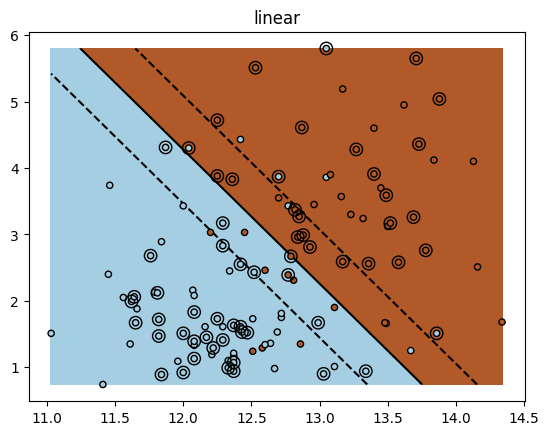

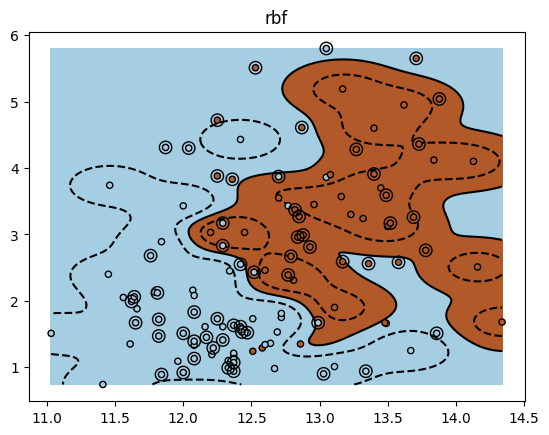

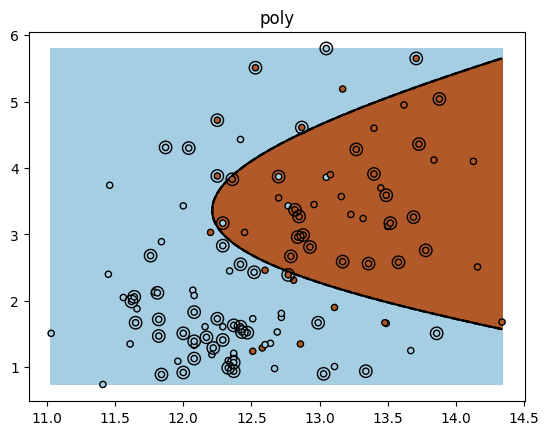

In [36]:
import matplotlib.pyplot as plt
X = wine.data
y = wine.target

X = X[y != 0, :2]
y = y[y != 0]

n_sample = len(X)

np.random.seed(0)
order = np.random.permutation(n_sample)
X = X[order]
y = y[order].astype(float)

X_train = X[: int(0.5 * n_sample)]
y_train = y[: int(0.5 * n_sample)]
X_test = X[int(0.5 * n_sample) :]
y_test = y[int(0.5 * n_sample) :]

# fit the model
for kernel in ("linear", "rbf", "poly"):
    clf = svm.SVC(kernel=kernel, gamma=10)
    clf.fit(X_train, y_train)

    plt.figure()
    plt.clf()
    plt.scatter(
        X[:, 0], X[:, 1], c=y, zorder=10, cmap=plt.cm.Paired, edgecolor="k", s=20
    )

    # Circle out the test data
    plt.scatter(
        X_test[:, 0], X_test[:, 1], s=80, facecolors="none", zorder=10, edgecolor="k"
    )

    plt.axis("tight")
    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.title(kernel)
plt.show()

## Redes Neuronales Profundas, DNN

In [41]:

from sklearn.preprocessing import StandardScaler, OneHotEncoder
import tensorflow as tf

X = wine.data
y = wine.target.reshape(-1, 1)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode labels into one-hot encoding
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y)

# Split the dataset into training and testing (50% each)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)#notese el tamaño de 0.2

# Create the DNN model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(wine.target_names), activation='softmax')  # Number of classes in the wine dataset, the classes are the number of exits
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_test, y_test))

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss on test set: {loss}')
print(f'Accuracy on test set: {accuracy}')

Epoch 1/10


c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


9/9 [==============================] - 1s 44ms/step - loss: 1.0273 - accuracy: 0.4859 - val_loss: 0.8083 - val_accuracy: 0.6944
Epoch 2/10
9/9 [==============================] - 0s 4ms/step - loss: 0.7612 - accuracy: 0.8239 - val_loss: 0.6165 - val_accuracy: 0.9167
Epoch 3/10
9/9 [==============================] - 0s 4ms/step - loss: 0.5752 - accuracy: 0.9085 - val_loss: 0.4724 - val_accuracy: 0.9444
Epoch 4/10
9/9 [==============================] - 0s 4ms/step - loss: 0.4375 - accuracy: 0.9296 - val_loss: 0.3629 - val_accuracy: 0.9444
Epoch 5/10
9/9 [==============================] - 0s 7ms/step - loss: 0.3306 - accuracy: 0.9718 - val_loss: 0.2774 - val_accuracy: 0.9444
Epoch 6/10
9/9 [==============================] - 0s 5ms/step - loss: 0.2526 - accuracy: 0.9718 - val_loss: 0.2127 - val_accuracy: 0.9722
Epoch 7/10
9/9 [==============================] - 0s 4ms/step - loss: 0.1930 - accuracy: 0.9718 - val_loss: 0.1693 - val_accuracy: 0.9722
Epoch 8/10
9/9 [============================

## Redes Convolucionales CNN

In [46]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Load the wine dataset
wine_data = datasets.load_wine()

x = wine_data.data
y_ = wine_data.target.reshape(-1, 1)

# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y_)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Build the model
model = Sequential()

model.add(Dense(10, input_shape=(13,), activation='relu', name='Dense-1'))  # Adjust input shape
model.add(Flatten())
model.add(Dense(10, activation='relu', name='Dense-2'))
model.add(Dense(len(wine_data.target_names), activation='softmax', name='output'))

# Adam optimizer with learning rate of 0.001
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

print('Neural Network Model Summary:')
print(model.summary())

# Train the model
model.fit(X_train, y_train, verbose=2, batch_size=4, epochs=1000)

# Test on unseen data
results = model.evaluate(X_test, y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

Neural Network Model Summary:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Dense-1 (Dense)             (None, 10)                140       
                                                                 
 flatten_2 (Flatten)         (None, 10)                0         
                                                                 
 Dense-2 (Dense)             (None, 10)                110       
                                                                 
 output (Dense)              (None, 3)                 33        
                                                                 
Total params: 283
Trainable params: 283
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000


c:\ProgramData\anaconda3\envs\machineV1\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


36/36 - 0s - loss: 48.3239 - accuracy: 0.3169 - 314ms/epoch - 9ms/step
Epoch 2/1000
36/36 - 0s - loss: 10.9294 - accuracy: 0.2817 - 31ms/epoch - 848us/step
Epoch 3/1000
36/36 - 0s - loss: 3.1227 - accuracy: 0.2183 - 30ms/epoch - 847us/step
Epoch 4/1000
36/36 - 0s - loss: 2.1261 - accuracy: 0.2324 - 30ms/epoch - 841us/step
Epoch 5/1000
36/36 - 0s - loss: 1.9222 - accuracy: 0.2465 - 30ms/epoch - 837us/step
Epoch 6/1000
36/36 - 0s - loss: 1.8389 - accuracy: 0.2465 - 31ms/epoch - 855us/step
Epoch 7/1000
36/36 - 0s - loss: 1.5323 - accuracy: 0.2394 - 30ms/epoch - 845us/step
Epoch 8/1000
36/36 - 0s - loss: 1.4884 - accuracy: 0.3239 - 30ms/epoch - 838us/step
Epoch 9/1000
36/36 - 0s - loss: 1.4253 - accuracy: 0.3944 - 30ms/epoch - 838us/step
Epoch 10/1000
36/36 - 0s - loss: 1.2731 - accuracy: 0.3592 - 30ms/epoch - 843us/step
Epoch 11/1000
36/36 - 0s - loss: 1.2697 - accuracy: 0.3662 - 30ms/epoch - 837us/step
Epoch 12/1000
36/36 - 0s - loss: 1.3417 - accuracy: 0.3592 - 29ms/epoch - 799us/step
E

## Redes Probabilisticas PNN

In [1]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KernelDensity

class PNN:
    def __init__(self, sigma=1.0):
        self.sigma = sigma
        self.classes = None
        self.models = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        for c in self.classes:
            X_class = X[y == c]
            self.models[c] = KernelDensity(kernel='gaussian', bandwidth=self.sigma).fit(X_class)
    
    def predict(self, X):
        probabilities = np.zeros((X.shape[0], len(self.classes)))
        for i, c in enumerate(self.classes):
            log_density = self.models[c].score_samples(X)
            probabilities[:, i] = np.exp(log_density)
        return self.classes[np.argmax(probabilities, axis=1)]

# Load Wine data
wine = load_wine()
X = wine.data
y = wine.target

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scaler labels
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Made and train model
pnn = PNN(sigma=1.0)
pnn.fit(X_train, y_train)

# Predict
y_pred = pnn.predict(X_test)

# Test model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy PNN: {accuracy}')


Model Accuracy PNN: 0.9629629629629629
